# **PREPARACIÓN DE DATOS**



#**PARTE A: Limpieza de datos y análisis de datos nominales o categóricos**

Considere la siguiente base de datos sobre el COVID 19 en Colombia, donde se registra los casos positivos. En esta base de datos, se eliminaron las variables de fechas. 

In [ ]:
import pandas as pd

datos = pd.read_excel("local/data/COVID.xlsx", names = None) # Lee los datos con separación con coma entre datos
display(datos)

FileNotFoundError: ignored

A partir de la anterior base de datos, realizar una limpieza de datos que permita imputar datos faltantes y eliminar posibles datos atípicos u outliers. 

In [ ]:
datos['País de procedencia'] = datos['País de procedencia'].fillna(value = 'Colombia')
datos['Codigo pais'] = datos['Codigo pais'].fillna(value = 170.0)
datos = datos.dropna(subset=['atención', 'Estado'])
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520984 entries, 0 to 522137
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ciudad de ubicación  520984 non-null  object 
 1   atención             520984 non-null  object 
 2   Edad                 520984 non-null  int64  
 3   Sexo                 520984 non-null  object 
 4   Tipo                 520984 non-null  object 
 5   Estado               520984 non-null  object 
 6   País de procedencia  520984 non-null  object 
 7   Tipo recuperación    348840 non-null  object 
 8   Codigo departamento  520984 non-null  int64  
 9   Codigo pais          520984 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 43.7+ MB


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer # Método de imputación
 
imp_3 = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent') # Rellena los datos NaN por medio del cálculo de los valores más frecuentes
imp_3.fit(datos)
Datos_Frecuentes = imp_3.transform(datos)
Datos_Frecuentes

array([['Bogotá D.C.', 'Recuperado', 19, ..., 'PCR', 11, 380.0],
       ['Guadalajara de Buga', 'Recuperado', 34, ..., 'PCR', 76, 724.0],
       ['Medellín', 'Recuperado', 50, ..., 'PCR', 5, 724.0],
       ...,
       ['Zona Bananera', 'Casa', 51, ..., 'Tiempo', 47, 170.0],
       ['Zona Bananera', 'Casa', 63, ..., 'Tiempo', 47, 170.0],
       ['Magangué', 'Casa', 38, ..., 'Tiempo', 13, 170.0]], dtype=object)

In [ ]:
import pandas as pd

datos_1 = pd.DataFrame(Datos_Frecuentes, columns=datos.columns)
datos_1

,Ciudad de ubicación,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Tipo recuperación,Codigo departamento,Codigo pais
0,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,PCR,11,380
1,Guadalajara de Buga,Recuperado,34,M,Importado,Leve,ESPAÑA,PCR,76,724
2,Medellín,Recuperado,50,F,Importado,Leve,ESPAÑA,PCR,5,724
3,Medellín,Recuperado,55,M,Relacionado,Leve,Colombia,PCR,5,170
4,Medellín,Recuperado,25,M,Relacionado,Leve,Colombia,PCR,5,170
...,...,...,...,...,...,...,...,...,...,...
520979,Zona Bananera,Casa,0,F,En estudio,Leve,Colombia,Tiempo,47,170
520980,Zona Bananera,Casa,24,F,En estudio,Leve,Colombia,Tiempo,47,170
520981,Zona Bananera,Casa,51,M,En estudio,Leve,Colombia,Tiempo,47,170
520982,Zona Bananera,Casa,63,M,En estudio,Leve,Colombia,Tiempo,47,170


In [ ]:
datos_1['Tipo'] = datos_1['Tipo'].replace('RELACIONADO','Relacionado')
datos_1['Tipo'] = datos_1['Tipo'].replace('relacionado','Relacionado')

median = datos_1['Edad'].median()
mean = datos_1['Edad'].mean()
std = datos_1['Edad'].std()

datos_1 = datos_1[ (datos_1['Edad'] < mean*2.5)]

datos_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520858 entries, 0 to 520983
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ciudad de ubicación  520858 non-null  object
 1   atención             520858 non-null  object
 2   Edad                 520858 non-null  object
 3   Sexo                 520858 non-null  object
 4   Tipo                 520858 non-null  object
 5   Estado               520858 non-null  object
 6   País de procedencia  520858 non-null  object
 7   Tipo recuperación    520858 non-null  object
 8   Codigo departamento  520858 non-null  object
 9   Codigo pais          520858 non-null  object
dtypes: object(10)
memory usage: 43.7+ MB


Una vez realizado la imputación de datos faltantes y la eliminación de datos atípicos, hacer un análisis de los datos nominales o categóricos como se explico en la unidad 1, el cual permita extraer información útil para comprender el comportamiento de los datos.

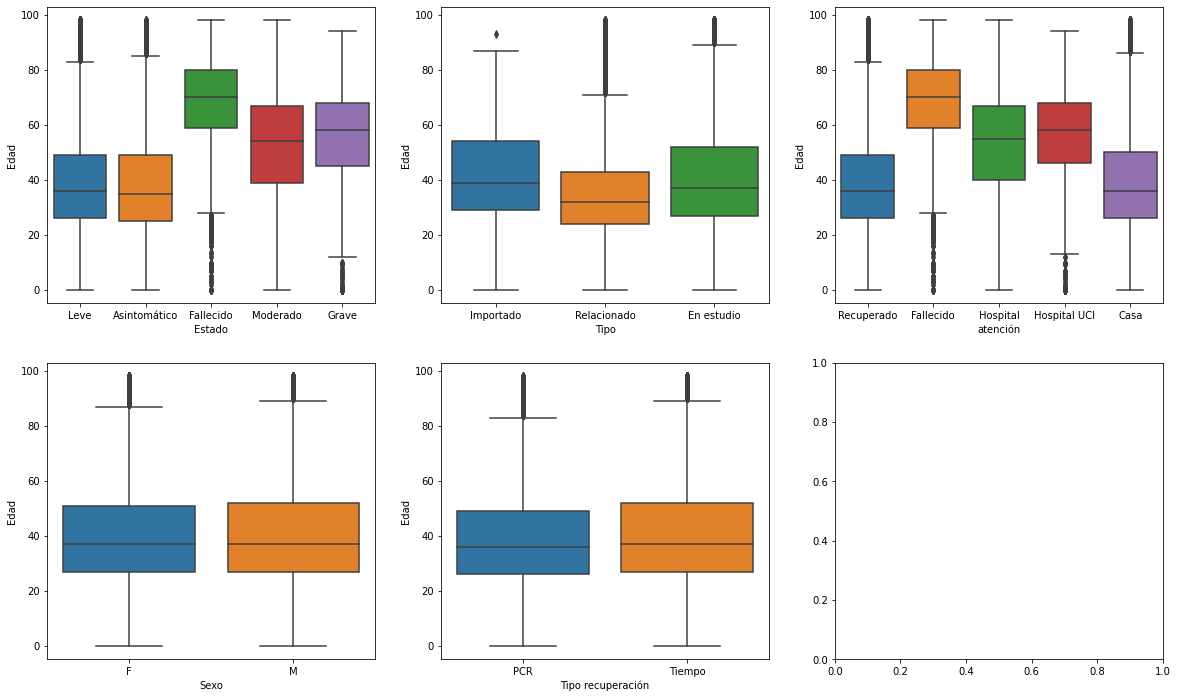

In [ ]:
import seaborn as sns # Librería de visualización para data science
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(w=20, h=12)

ax = sns.boxplot(x="Estado", y="Edad", data=datos_1, orient='v', ax=axes[0, 0])
ax = sns.boxplot(x="Tipo", y="Edad", data=datos_1, orient='v', ax=axes[0, 1])
ax = sns.boxplot(x="atención", y="Edad", data=datos_1, orient='v', ax=axes[0, 2])
ax = sns.boxplot(x="Tipo recuperación", y="Edad", data=datos_1, orient='v', ax=axes[1, 1])
ax = sns.boxplot(x="Sexo", y="Edad", data=datos_1, orient='v', ax=axes[1, 0])

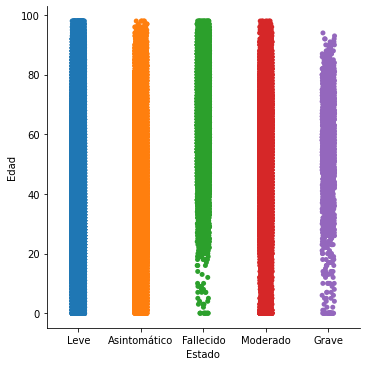

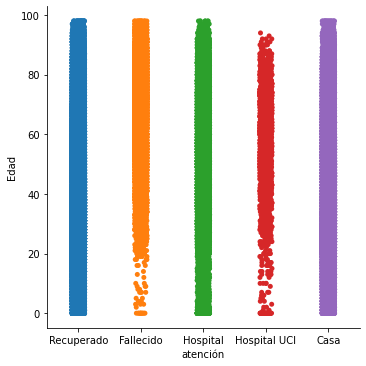

In [ ]:
sns.catplot(x="Estado", y="Edad", data=datos_1)
sns.catplot(x="atención", y="Edad", data=datos_1)

,País de procedencia,Count
15,Colombia,519894
19,ESPAÑA,265
20,ESTADOS UNIDOS,217
16,ECUADOR,68
7,BRASIL,64
33,MÉXICO,53
35,PANAMA,34
46,TURQUÍA,28
10,CHILE,20
22,FRANCIA,20


<Figure size 1440x1440 with 0 Axes>

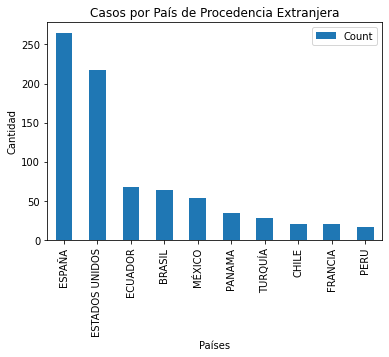

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

df3 = datos_1.groupby(['País de procedencia'])[['Edad']].count().reset_index()

df3.rename(columns={'Edad':'Count'}, inplace=True)

df3 = df3.sort_values(by=['Count'], ascending=False)

display(df3.head(20))

df3[df3['País de procedencia'] != 'Colombia'].head(10).plot.bar(x='País de procedencia', y='Count')

plt.title('Casos por País de Procedencia Extranjera')
plt.ylabel('Cantidad')
plt.xlabel('Países')
plt.show()

,Ciudad de ubicación,Count
92,Bogotá D.C.,181033
461,Medellín,38921
78,Barranquilla,35085
120,Cali,32866
139,Cartagena de Indias,18648
...,...,...
405,La Primavera,1
373,Jardín,1
350,Hato,1
345,Gámeza,1


<Figure size 1440x1440 with 0 Axes>

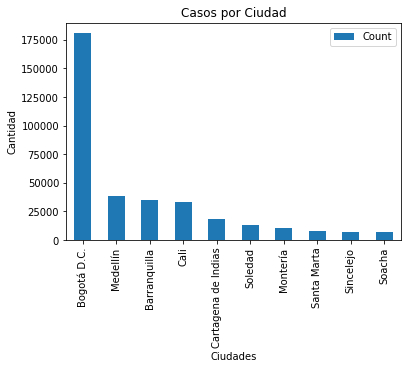

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

df3 = datos_1[datos_1['Codigo pais'] ==170]

df3 = df3.groupby(['Ciudad de ubicación'])[['Edad']].count().reset_index()

df3.rename(columns={'Edad':'Count'}, inplace=True)

df3 = df3.sort_values(by=['Count'], ascending=False)

display(df3)

df3.head(10).plot.bar(x='Ciudad de ubicación', y='Count')

plt.title('Casos por Ciudad')
plt.ylabel('Cantidad')
plt.xlabel('Ciudades')
plt.show()

,Sexo,Count
1,M,268585
0,F,251309


<Figure size 1440x1440 with 0 Axes>

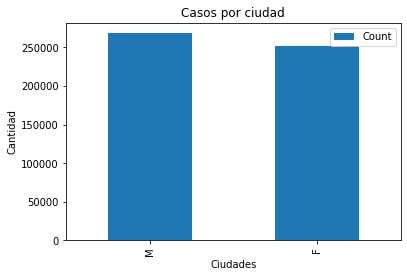

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

df3 = datos_1[datos_1['Codigo pais'] ==170]

df3 = df3.groupby(['Sexo'])[['Edad']].count().reset_index()

df3.rename(columns={'Edad':'Count'}, inplace=True)

df3 = df3.sort_values(by=['Count'], ascending=False)

display(df3)

df3.head(10).plot.bar(x='Sexo', y='Count')
plt.title('Casos por ciudad')
plt.ylabel('Cantidad')
plt.xlabel('Ciudades')
plt.show()

,Estado,Count
3,Leve,419809
0,Asintomático,60922
4,Moderado,20475
1,Fallecido,16462
2,Grave,2226


<Figure size 1440x1440 with 0 Axes>

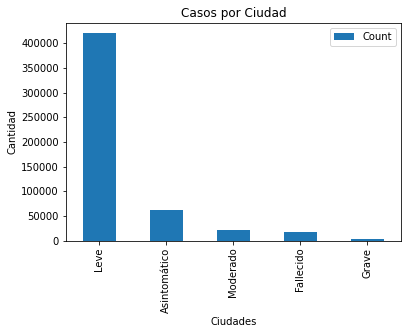

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

df3 = datos_1[datos_1['Codigo pais'] ==170]

df3 = df3.groupby(['Estado'])[['Edad']].count().reset_index()

df3.rename(columns={'Edad':'Count'}, inplace=True)

df3 = df3.sort_values(by=['Count'], ascending=False)

display(df3)

df3.head(10).plot.bar(x='Estado', y='Count')

plt.title('Casos por Ciudad')
plt.ylabel('Cantidad')
plt.xlabel('Ciudades')
plt.show()

Lo primero que se hizo sobre este conjunto de datos fue reemplazar los valores faltantes en las columnas "País de procedencia" y "Codigo pais" por 'Colombia" y '170.0', respectivamente; este último código corresponde al código ISO3 para los países. La imputación de los datos faltantes para las variables categóricas "Estado" y "atención" se hizo por medio del cálculo de los valores más frecuentes a través del método de imputación SimpleImputer. Para completar la limpieza del dataset, se procede a estandarizar los valores de la variable "Tipo", y a detectar y eliminar los datos atípicos, considerando como dato atípico todo lo que este a más de 2.5 desviaciones estándar de la media.

A partir de los boxplot se puede inferir que: 1) La edad media de las personas fallecidas a causa de COVID 19 es de 70 años apróx. 2) La edad media tanto de hombres como de mujeres diagnosticados con COVID 19 está alrededor de los 40 años, aunque también se encuentran personas entre los 90 y 100 años. 3) La edad promedio de los pacientes que recibieron atención domiciliaria de la enfermedad es similar a la de aquellos que se recuperaron, y son menores de 40 años; mientras que los pacientes mayores de 50 años pero menores de 60, están siendo atendidos en hospitales y UCI. Adicionalmente, los pacientes que presentan mayor atención domiciliaria o aquellos que se encuentran en estado recuperado son menores de 20 años.

A partir de los histogramas, se tiene que más del 99% de las personas con COVID son colombianos: (519.894/522.138)*100%, y que la mayoría de estos casos de contagio se registran para la ciudad de Bogotá, seguido por Medellín, Barranquilla y Cali. Los pacientes extranjeros que mayor contagio presentan, proceden de España y EEUU. El número de contagios en hombres y mujeres por ciudad es similar, y la mayoría de estos diagnósticos es leve.



#**PARTE B: Codificación de los valores categóricos**

A partir de la base de datos con la limpieza de datos realizada, se procede a desarrollar las siguientes tareas:

1.   Aplicar Label Enconder a las variables categóricas.
2.   Crear una nueva base de datos en el siguiente orden de las características:
     Ciudad de ubicación, Departamento o Distrito,	atención,	Edad, Tipo, Estado, País de procedencia,	Tipo recuperación,	Codigo departamento,	Codigo pais y Sexo

In [ ]:
import pandas as pd

datos_2 = datos_1.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas

LE = LabelEncoder()

DATA_LE = []

for i in datos_2.columns:
  DATA_LE.append(LE.fit_transform(datos_2[i]))

resultados = pd.DataFrame(DATA_LE[0:10], index=datos.iloc[:,0:10].columns)

datos_3 = resultados.T

datos_3

,Ciudad de ubicación,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Tipo recuperación,Codigo departamento,Codigo pais
0,92,4,19,0,1,3,28,0,2,19
1,323,4,34,1,1,3,19,0,23,33
2,461,4,50,0,1,3,19,0,0,33
3,461,4,55,1,2,3,15,0,0,6
4,461,4,25,1,2,3,15,0,0,6
...,...,...,...,...,...,...,...,...,...,...
520853,921,0,0,0,0,3,15,1,445,330
520854,921,0,24,0,0,3,15,1,444,329
520855,921,0,51,1,0,3,15,1,443,326
520856,921,0,63,1,0,3,15,1,501,358


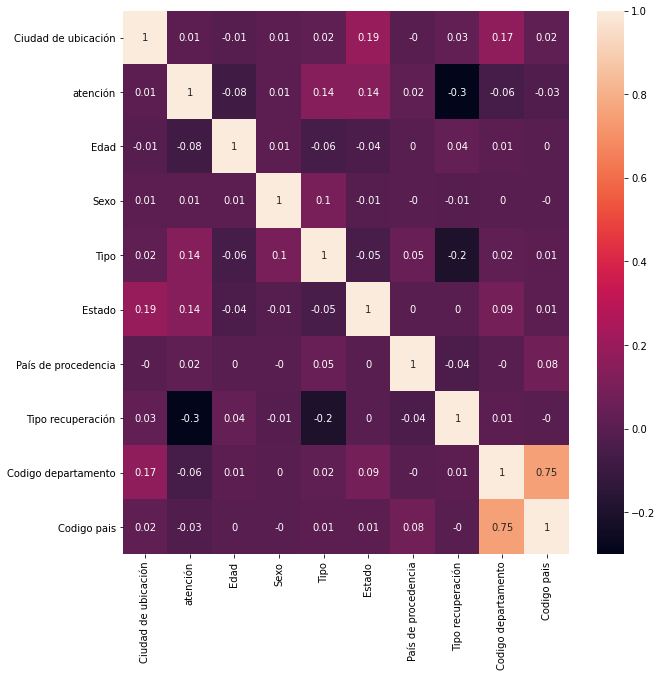

In [ ]:
import seaborn as sn
from matplotlib import pyplot

Matriz_Correlacion = datos_3.corr()
Matriz_Correlacion = Matriz_Correlacion.round(decimals=2, out=None)

pyplot.figure(figsize=(10,10))
ax = sn.heatmap(Matriz_Correlacion, annot=True, fmt='g')
pyplot.show()

#**PARTE C: Clasificación de los datos**

Teniendo en cuenta la nueva base de datos, se procede a clasificar los datos si una persona es masculina o femenina. Para esto, se sugiere separar los datos en dos partes: La primera base de datos corresponde a las características Ciudad de ubicación, Departamento o Distrito, atención, Edad, Tipo, Estado, País de procedencia, Tipo recuperación, Codigo departamento y Codigo pais. La segunda base de datos corresponde a la característica sexo. Se recomienda llamar a la primera base de datos como $x$ y la segunda base de datos como $y$. Luego, separe los datos en entrenamiento y validación, con una proporción $70\% / 30\%$, tal y como se explicó en la unidad 2 de la asignatura. A partir de los datos de entrenamiento y prueba, utilizar los algoritmos LDA y Naive Bayes explicados en la unidad 2 para clasificar los datos, analizando cuál modelo tiene una mayor puntaje o score. 

In [ ]:
datos_4= datos_3.copy()

X = datos_4.drop(['Sexo'],axis=1).values
Y = pd.DataFrame(datos_4['Sexo']).values

display(X)

print('Número de muestras = ', X.shape[0])
print('Número de dimensiones = ', X.shape[1])

display(Y)

array([[92, 4, 19, ..., 0, 11, 380.0],
       [323, 4, 34, ..., 0, 76, 724.0],
       [461, 4, 50, ..., 0, 5, 724.0],
       ...,
       [921, 0, 51, ..., 1, 47, 170.0],
       [921, 0, 63, ..., 1, 47, 170.0],
       [437, 0, 38, ..., 1, 13, 170.0]], dtype=object)

Número de muestras =  520984
Número de dimensiones =  9


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba

X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X, Y, test_size = 0.3, random_state = 17)

print('Tamaño de los datos de entrenamiento: ', X_Entrenamiento.shape)
print('Tamaño de los datos de prueba: ', X_Prueba.shape)
print('Tamaño del vector de clases de entrenamiento: ', Y_Entrenamiento.shape)
print('Tamaño del vector de clases de prueba: ', Y_Prueba.shape)

Tamaño de los datos de entrenamiento:  (364688, 9)
Tamaño de los datos de prueba:  (156296, 9)
Tamaño del vector de clases de entrenamiento:  (364688, 1)
Tamaño del vector de clases de prueba:  (156296, 1)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver = 'lsqr', store_covariance = True, tol = 1e-4) #lsqr = Least squares solution
LDA.fit(X_Entrenamiento, Y_Entrenamiento.ravel())

clases_predict = LDA.predict(X_Prueba)
clases_predict, Y_Prueba.ravel()

validacion = LDA.score(X_Prueba, Y_Prueba)
validacion

0.5181258637457132

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = clases_predict)

print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

Matriz de Confusión del modelo LDA: 
 [[29196 46381]
 [28934 51785]]
El número de verdaderos positivos es igual a 29196.0 muestras
El número de verdaderos negativos es igual a 51785.0 muestras
El número de falsos negativos es igual a 46381.0 muestras
El número de falsos positivos es igual a 28934.0 muestras
Se clasificaron correctamente 80981.0 muestras
Se clasificaron incorrectamente 75315.0 muestras


In [ ]:
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo Gaussiano
GNB = GaussianNB(var_smoothing = 1e-9) # var_smoothing es la porción de la mayor variación de todas las características que se añade a las variaciones para la estabilidad del cálculo.
GNB.fit(X_Entrenamiento,Y_Entrenamiento)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo Gaussiano

GNB = GaussianNB(var_smoothing = 1e-8) # var_smoothing es la porción de la mayor variación de todas las características que se añade a las variaciones para la estabilidad del cálculo.
GNB.fit(X_Entrenamiento,Y_Entrenamiento)

Clases_Predichas = GNB.predict(X_Prueba)
Score = 100*(GNB.score(X_Prueba, Y_Prueba))

print(Score)

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas)

print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.90469365818703
Matriz de Confusión del modelo LDA: 
 [[72495  3082]
 [73652  7067]]
El número de verdaderos positivos es igual a 72495.0 muestras
El número de verdaderos negativos es igual a 7067.0 muestras
El número de falsos negativos es igual a 3082.0 muestras
El número de falsos positivos es igual a 73652.0 muestras
Se clasificaron correctamente 79562.0 muestras
Se clasificaron incorrectamente 76734.0 muestras


*Registre aquí las conclusiones*

Entre los algoritmos Análisis de Discriminante Lineal y Bayes ingenuo gaussiano usados para clasificar los datos, el modelo que tiene mayor puntaje o score es el primero de ellos con 51.8%; sin embargo, los dos modelos arrojan un puntaje muy similar y no tan bueno. A partir de las matrices de confusión de ambos modelos, se tiene que con LDA se clasificaron correctamente 80.981 muestras e incorrectamente 75.315 muestras, mientras que con con Naive Bayes se clasificaron correctamente 79.562 muestras y, en forma incorrecta, 76.734.

#**PARTE D: Reducción de dimensionalidad de los datos**

Considere el siguiente problema:

En un laboratorio de laser ultra rápido, están desarrollando un generador de peines de frecuencia óptica para enviar información de un canal de transmisión a un canal de recepción con 25 km de fibra óptica monomodo. Durante los ensayos en la transmisión, se realizaron variaciones de voltaje y frecuencia de un generador PBRS (Pseudo Random Binary Sequence), el cual genera una secuencia pseudo aleatoria de bits de información. A partir de los ensayos, se creo una base de datos que se muestra a continuación:

In [ ]:
import pandas as pd

Datos_Espectros = pd.read_excel("local/data/Espectros.xlsx", names = None) # Lee los datos con separación con coma entre datos
display(Datos_Espectros)

print("Número de características: ", Datos_Espectros.shape[1])

,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.00,-210.00,-64.02,-210.00,-83.66,-63.43,-59.84,-61.58,-210.00,-210.00,-210.00,-62.84,-210.00,-210.00,-210.00,-66.41,-65.75,-210.00,-210.00,-64.16,-210.00,-210.00,-210.00,-210.00,-210.00,-62.34,-66.62,-63.29,-210.00,-210.00,-69.84,-210.00,-210.00,-210.00,-73.06,-70.01,-210.00,-210.00,-210.00,-210.00,...,-210.00,-63.22,-71.21,-210.00,-210.00,-210.00,-67.14,-210.00,-62.99,-60.15,-63.42,-210.00,-210.00,-62.15,-210.00,-210.00,-62.94,-61.64,-65.12,-69.27,-210.00,-210.00,-210.00,-69.15,-210.00,-210.00,-210.00,-68.98,-210.00,-210.00,-61.80,-210.00,-63.29,-210.00,-210.00,-60.49,-78.61,-210.00,-210.00,-66.17
1,-210.00,-64.63,-210.00,-210.00,-210.00,-210.00,-210.00,-63.48,-210.00,-210.00,-210.00,-66.45,-210.00,-210.00,-210.00,-64.92,-63.60,-210.00,-86.67,-67.38,-75.40,-210.00,-60.49,-61.05,-71.87,-63.67,-210.00,-61.04,-210.00,-75.74,-210.00,-210.00,-210.00,-65.16,-210.00,-60.34,-69.69,-76.94,-210.00,-210.00,...,-210.00,-65.11,-60.99,-210.00,-64.17,-65.54,-69.30,-65.54,-210.00,-66.92,-61.63,-210.00,-210.00,-210.00,-64.27,-210.00,-65.52,-210.00,-65.96,-65.30,-72.39,-67.88,-64.99,-210.00,-63.53,-210.00,-62.24,-210.00,-210.00,-62.74,-69.12,-63.10,-62.05,-69.03,-69.16,-64.39,-210.00,-210.00,-210.00,-210.00
2,-65.39,-68.48,-64.56,-65.30,-67.39,-70.44,-60.92,-63.52,-63.84,-210.00,-210.00,-62.87,-210.00,-74.17,-210.00,-210.00,-62.23,-70.32,-210.00,-62.72,-210.00,-210.00,-79.69,-210.00,-66.96,-62.79,-210.00,-210.00,-210.00,-210.00,-64.03,-210.00,-210.00,-210.00,-210.00,-210.00,-66.61,-210.00,-62.07,-77.33,...,-61.69,-210.00,-210.00,-210.00,-83.25,-67.38,-210.00,-67.38,-59.35,-66.77,-210.00,-65.60,-210.00,-63.67,-60.39,-67.57,-210.00,-61.34,-210.00,-60.27,-210.00,-210.00,-68.35,-71.71,-210.00,-210.00,-210.00,-62.00,-60.98,-59.06,-67.07,-210.00,-64.13,-67.56,-61.75,-69.27,-62.78,-62.91,-69.26,-210.00
3,-210.00,-60.27,-73.57,-83.65,-72.10,-210.00,-65.00,-66.16,-210.00,-63.75,-65.61,-210.00,-67.46,-210.00,-210.00,-210.00,-210.00,-64.50,-64.25,-210.00,-210.00,-210.00,-210.00,-66.95,-74.62,-210.00,-210.00,-68.15,-66.60,-65.11,-210.00,-210.00,-210.00,-210.00,-210.00,-61.34,-210.00,-65.95,-63.80,-65.42,...,-210.00,-66.18,-63.51,-210.00,-64.19,-210.00,-65.12,-210.00,-62.75,-66.60,-210.00,-210.00,-210.00,-63.66,-65.20,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-64.24,-210.00,-74.26,-210.00,-71.13,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-66.53,-64.01,-66.33,-210.00,-210.00
4,-65.69,-64.45,-210.00,-60.33,-67.97,-68.71,-210.00,-71.10,-61.00,-61.02,-210.00,-64.45,-63.50,-210.00,-210.00,-78.09,-210.00,-60.24,-210.00,-62.10,-74.02,-70.96,-210.00,-210.00,-76.41,-65.39,-210.00,-63.91,-63.36,-60.93,-210.00,-210.00,-210.00,-66.10,-210.00,-69.64,-67.36,-67.01,-67.77,-75.53,...,-64.62,-68.19,-71.72,-210.00,-63.56,-210.00,-210.00,-210.00,-210.00,-63.29,-66.35,-61.84,-210.00,-210.00,-76.75,-61.05,-210.00,-68.62,-61.67,-210.00,-210.00,-210.00,-210.00,-61.66,-59.74,-61.63,-210.00,-210.00,-65.89,-210.00,-210.00,-64.08,-58.07,-63.52,-210.00,-73.36,-70.89,-64.21,-210.00,-210.00
...,...,...,...,

Número de características:  91


In [ ]:
Datos_Espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Espectro 1   3501 non-null   float64
 1   Espectro 2   3501 non-null   float64
 2   Espectro 3   3501 non-null   float64
 3   Espectro 4   3501 non-null   float64
 4   Espectro 5   3501 non-null   float64
 5   Espectro 6   3501 non-null   float64
 6   Espectro 7   3501 non-null   float64
 7   Espectro 8   3501 non-null   float64
 8   Espectro 9   3501 non-null   float64
 9   Espectro 10  3501 non-null   float64
 10  Espectro 11  3501 non-null   float64
 11  Espectro 12  3501 non-null   float64
 12  Espectro 13  3501 non-null   float64
 13  Espectro 14  3501 non-null   float64
 14  Espectro 15  3501 non-null   float64
 15  Espectro 16  3501 non-null   float64
 16  Espectro 17  3501 non-null   float64
 17  Espectro 18  3501 non-null   float64
 18  Espectro 19  3501 non-null   float64
 19  Espect

Considerando la anterior base de datos, se desea satisfacer las siguientes condiciones que requieren los expertos del experimento:

*   Los expertos quieren saber si se puede reducir la cantidad de características de los datos, sin perder información relevante del comportamiento de los espectros ópticos.
*   Los expertos necesitan tener varias opciones de reducción de dimensionalidad, usando diferentes algoritmos para determinar cuál es la mejor opción.
*   Preferiblemente, los expertos recomienda antes de reducir la dimensionalidad, hacer una normalización de los datos.

De acuerdo a estos requisitos, el objetivo es encontrar la mejor reducción de dimensionalidad de los datos para que los expertos puedan interpretar de una mejor forma el comportamiento de los espectros ópticos para tomar la mejor decisión posible.

**Nota:** Cada espectro óptico esta representado en unidades de dBm.



In [ ]:
# import pandas as pd

# Datos_Espectros_2 = Datos_Espectros.copy()
# Datos_Espectros_2 = Datos_Espectros_2.replace([Datos_Espectros_2.iloc[0]['Espectro 1']], np.NaN)
# Datos_Espectros_2

In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer # Método de imputación

# imp_4 = SimpleImputer(missing_values = np.nan, strategy= 'median') # Rellena los datos NaN por medio del cálculo de los valores más frecuentes
# imp_4.fit(Datos_Espectros_2)

# Datos_Espectros_2_imp = imp_4.transform(Datos_Espectros_2)
# Datos_Espectros_2_imp

In [ ]:
# Datos_Espectros_2_imp = pd.DataFrame(Datos_Espectros_2_imp, index = list(Datos_Espectros_2.index), columns = list(Datos_Espectros_2.columns))
# Datos_Espectros_2_imp

In [ ]:
# Datos_Espectros_2.info()

In [ ]:
Datos_Espectros_2_imp = Datos_Espectros.copy()

In [ ]:
# Eliminación de datos atípicos: ISOLATION FOREST METHOD

from sklearn.ensemble import IsolationForest # algoritmo de aislamiento forestal
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

ISF = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.6, random_state = 17)
DA = ISF.fit_predict(Datos_Espectros_2_imp)

Puntaje = ISF.score_samples(Datos_Espectros_2_imp) # Puntaje de los datos. Si el puntaje es más pequeño, entonces se considera un dato atípico

print("Detección: ", DA)
print("Puntaje de las muestras: ", Puntaje)

ground_truth = np.ones(len(Datos_Espectros_2_imp), dtype = int)

n_error = (DA != ground_truth).sum() # número de datos atípicos

print("Número de datos atípicos: ", n_error)

pos = np.where(DA == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)

Datos_Espectros_sin_out_2 = Datos_Espectros_2_imp.loc[pos, :]

display(Datos_Espectros_sin_out_2)

Detección:  [-1 -1 -1 ... -1 -1 -1]
Puntaje de las muestras:  [-0.643164   -0.62411451 -0.62786351 ... -0.61955622 -0.62348676
 -0.63145903]
Número de datos atípicos:  2100


,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
418,-61.67,-59.93,-74.96,-57.71,-59.56,-59.97,-60.12,-56.53,-58.64,-59.14,-58.41,-58.74,-59.30,-59.73,-58.20,-59.77,-58.68,-61.16,-56.06,-57.92,-59.01,-56.79,-56.46,-60.18,-58.92,-59.07,-59.44,-57.90,-56.89,-57.12,-58.02,-60.42,-60.42,-57.13,-56.99,-57.67,-56.96,-57.47,-57.18,-58.90,...,-57.35,-57.87,-58.06,-59.76,-64.59,-58.32,-73.48,-58.32,-60.58,-56.74,-59.79,-59.29,-58.52,-57.95,-67.30,-60.13,-60.31,-58.20,-63.07,-56.51,-58.87,-57.85,-59.51,-59.40,-57.08,-62.00,-210.00,-70.39,-60.47,-57.26,-61.15,-58.61,-59.26,-60.15,-56.75,-60.46,-63.80,-67.12,-59.15,-61.36
419,-64.47,-60.26,-58.12,-59.86,-57.44,-57.28,-59.20,-57.93,-59.44,-58.43,-59.60,-57.86,-57.30,-57.63,-55.69,-57.27,-56.69,-57.67,-57.74,-55.45,-57.50,-57.33,-58.60,-55.91,-58.90,-57.10,-58.49,-57.05,-57.56,-59.15,-55.23,-61.39,-61.39,-56.77,-56.86,-56.78,-58.15,-57.16,-57.98,-56.41,...,-57.51,-57.82,-57.05,-57.04,-57.98,-56.52,-58.95,-56.52,-57.36,-57.17,-57.05,-60.89,-59.06,-57.30,-58.41,-59.46,-59.18,-59.76,-58.23,-59.85,-59.24,-61.51,-57.26,-57.88,-61.29,-59.68,-58.60,-60.11,-57.92,-59.50,-57.46,-62.07,-60.24,-60.34,-57.19,-60.21,-62.12,-59.39,-60.55,-62.34
420,-58.16,-60.70,-62.74,-56.97,-57.33,-56.94,-58.85,-57.63,-57.36,-57.29,-56.83,-56.41,-57.88,-59.66,-56.65,-55.79,-56.21,-57.73,-57.22,-59.84,-56.35,-57.37,-55.98,-57.42,-57.44,-57.53,-58.53,-57.51,-58.80,-56.33,-57.72,-55.35,-55.35,-56.74,-57.26,-58.51,-57.28,-58.32,-56.53,-56.65,...,-57.17,-56.92,-56.13,-58.08,-57.87,-55.45,-57.12,-55.45,-58.68,-57.92,-56.88,-58.76,-57.10,-57.53,-57.40,-58.65,-57.94,-57.82,-58.60,-56.44,-56.32,-58.55,-58.64,-56.75,-58.04,-59.17,-58.15,-57.75,-56.89,-58.84,-60.83,-58.80,-60.66,-56.84,-57.85,-60.28,-62.98,-57.33,-72.38,-58.64
421,-58.12,-56.70,-58.16,-57.77,-57.54,-57.04,-58.19,-55.21,-55.18,-57.97,-55.48,-56.99,-57.72,-56.71,-55.54,-56.55,-56.34,-56.49,-56.84,-58.20,-58.44,-57.24,-56.10,-55.88,-57.19,-56.53,-58.90,-57.63,-59.38,-58.78,-55.23,-56.70,-56.70,-56.51,-55.66,-55.10,-57.63,-55.70,-57.76,-59.87,...,-57.35,-57.04,-57.04,-60.03,-55.79,-58.32,-57.75,-58.32,-57.88,-58.94,-56.93,-59.77,-56.23,-59.41,-57.65,-57.90,-58.31,-56.13,-56.85,-55.95,-57.45,-56.77,-60.17,-58.21,-58.28,-57.41,-56.55,-57.81,-57.00,-61.31,-59.27,-58.36,-57.27,-58.45,-60.60,-58.44,-210.00,-57.62,-57.89,-60.30
422,-55.70,-62.00,-55.41,-57.85,-58.10,-56.84,-55.91,-56.60,-55.46,-56.45,-56.05,-55.76,-57.94,-57.45,-58.16,-56.62,-59.87,-56.77,-56.81,-56.60,-56.79,-56.24,-57.60,-59.36,-58.18,-55.55,-56.49,-56.40,-57.17,-56.44,-58.02,-57.15,-57.15,-55.78,-58.33,-58.07,-57.47,-56.85,-57.79,-57.63,...,-58.64,-59.41,-57.77,-60.24,-58.35,-58.23,-56.74,-58.23,-58.31,-58.13,-64.00,-57.65,-57.16,-55.92,-58.22,-60.05,-58.33,-58.36,-59.56,-61.45,-71.40,-57.30,-60.34,-59.01,-58.66,-57.06,-59.41,-61.64,-58.14,-56.40,-61.78,-58.18,-58.13,-59.27,-58.34,-62.52,-63.24,-61.37,-67.38,-59.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# Normalización de los datos

def normalizacion_minmax(datos):  
  xmax = np.amax(datos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
  xmin = np.amin(datos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
  N,D = datos.shape # Dimenisones de los datos

  data_minmax = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
  for d in np.arange(D):
    for n in np.arange(N):
      data_minmax[n][d] = (datos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
      
  return data_minmax

[[0.83079422 0.8334907  0.         ... 0.10838022 0.8722174  0.85983687]
 [0.81511146 0.83165787 0.39735724 ... 0.33728161 0.86412258 0.85416787]
 [0.85045368 0.82921411 0.28834356 ... 0.3982825  0.79572131 0.87557124]
 ...
 [0.84378851 0.83315746 0.23100519 ... 0.33816997 0.88684591 0.87620755]
 [0.84507673 0.84648709 0.39027843 ... 0.2816109  0.86973114 0.86018395]
 [0.85745491 0.82227159 0.34379424 ... 0.20165828 0.86874819 0.85572974]]


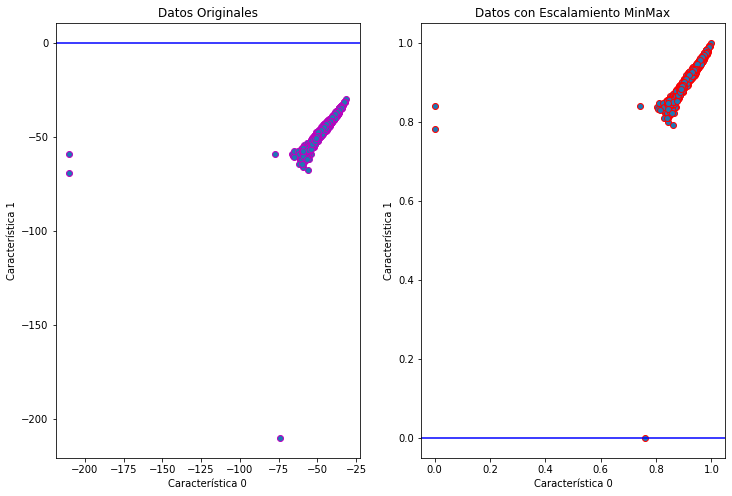

In [ ]:
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

Datos_Espectros_val_2 = Datos_Espectros_sin_out_2.values
Datos_Min_Max = normalizacion_minmax(Datos_Espectros_val_2) # Se realiza la transformación del conjunto de datos

print(Datos_Min_Max)  # Resultado del escalamiento minmax

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Espectros_val_2[:,0], Datos_Espectros_val_2[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Datos_Min_Max[:,0], Datos_Min_Max[:,1], edgecolors="r")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Escalamiento MinMax') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

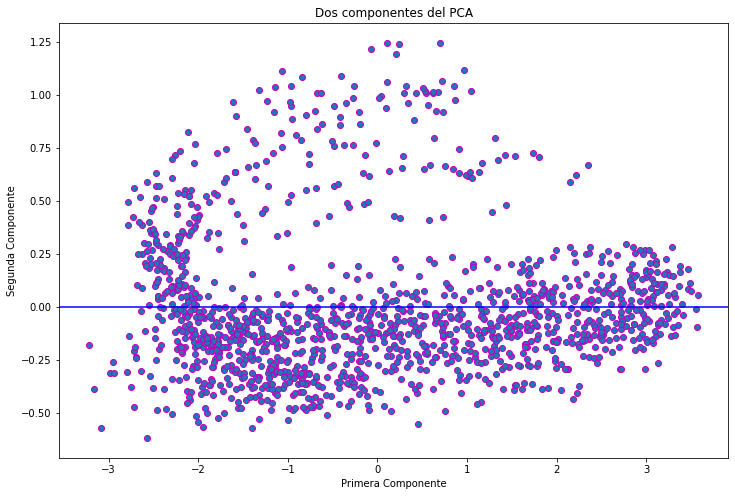

In [ ]:
# REDUCCIÓN DE DIMENSIONALIDAD
# MÉTODO 1: Análisis de Componentes Principales (PCA)

from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(iterated_power='auto', n_components = 91, random_state = 17, svd_solver='randomized', tol = 1e-3, whiten = False)
Variables_Principales = pca.fit_transform(Datos_Min_Max)
Variables_Principales

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y

pyplot.show() # Mostrar figura

In [ ]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales
Valores_Singulares = pca.singular_values_

In [ ]:
Importancia_Componentes = pd.DataFrame(data = Varianza)
Importancia_Componentes = Importancia_Componentes.T

print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes.loc[:,0:49].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 3 componentes:  [98.68056869]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [99.01019726]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [99.27297181]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [99.46689625]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [99.62118392]
Porcentaje de Varianza detectada para las primeras 50 componentes:  [99.74151666]


In [ ]:
Componentes_Seleccionadas = 3

Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])

Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

Datos_Reducidos_1 = Nuevas_Componentes.fit_transform(Datos_Min_Max) 

print('Tamaño de los datos originales con MinMax: ', Datos_Min_Max.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_Reducidos_1.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (1401, 91)
Tamaño de los datos reducidos:  (1401, 3)
Porcentaje de la varianza explicada con las componentes seleccionadas: 98.68%


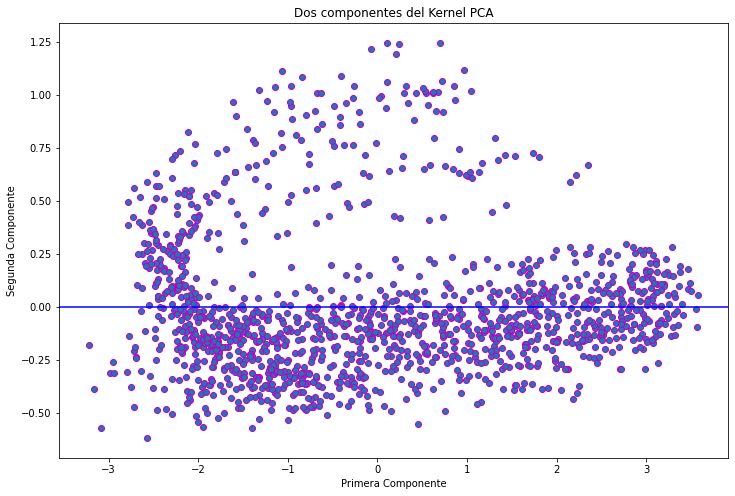

In [ ]:
# REDUCCIÓN DE DIMENSIONALIDAD
# MÉTODO 2: Kernel PCA

from sklearn.decomposition import KernelPCA # Cargamos el método Kernel PCA
from matplotlib import pyplot

kpca = KernelPCA(n_components = None, kernel = 'linear', fit_inverse_transform = True, gamma = 0.3)
Variables_Principales_Kernel = kpca.fit_transform(Datos_Min_Max)
Variables_Principales_Kernel

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_Kernel[:,0], Variables_Principales_Kernel[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del Kernel PCA') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y

pyplot.show() # Mostrar figura

(0.0, 89.0)

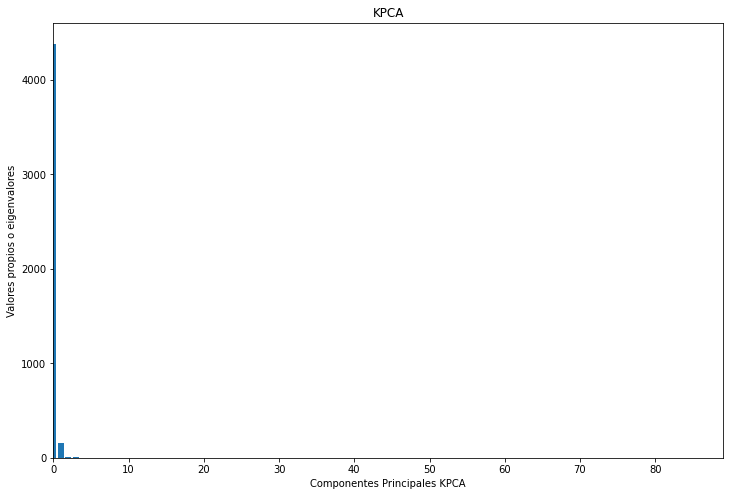

In [ ]:
lambdas_kpca = kpca.lambdas_ # Calculamos los eigenvalores o valores propios de la matriz kernel centrado en orden decreciente

# print("Valores propios del método kernel: ", lambdas_kpca)

fig = pyplot.figure(figsize=(12,8))

pyplot.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
pyplot.xlabel('Componentes Principales KPCA')
pyplot.ylabel('Valores propios o eigenvalores')
pyplot.title('KPCA')

pyplot.xlim(0, len(lambdas_kpca))

In [ ]:
NUM_Componentes = 3

kpca_main = KernelPCA(n_components = NUM_Componentes, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.5)

Datos_Kernel_RED = kpca_main.fit_transform(Datos_Min_Max)

print('Tamaño de los datos originales con MinMax: ', Datos_Min_Max.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Kernel PCA: ', Datos_Kernel_RED.shape) # Tamaño de los datos reducidos con Kernel PCA

Tamaño de los datos originales con MinMax:  (1401, 91)
Tamaño de los datos reducidos con Kernel PCA:  (1401, 3)


In [ ]:
Datos_inversa = kpca_main.inverse_transform(Datos_Kernel_RED)

print('Tamaño de los datos con transformada inversa: ', Datos_inversa.shape)

Tamaño de los datos con transformada inversa:  (1401, 91)


In [ ]:
def error_kernelpca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

Error promedio: 0.03


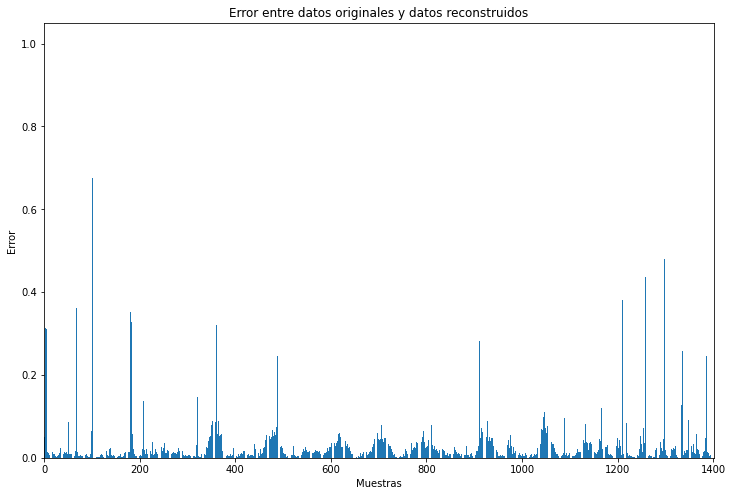

In [ ]:
Datos_Espectros_val_DF = pd.DataFrame(data = np.array(Datos_Min_Max))
Datos_inversa_DF = pd.DataFrame(data = np.array(Datos_inversa))
Error = error_kernelpca(Datos_Espectros_val_DF, Datos_inversa_DF)

print('Error promedio: {:.2f}'.format(np.mean(Error)))

fig = pyplot.figure(figsize=(12,8))

pyplot.bar(np.arange(len(Error)), Error)
pyplot.xlabel('Muestras')
pyplot.ylabel('Error')
pyplot.title('Error entre datos originales y datos reconstruidos')
pyplot.xlim(0, len(Error))

pyplot.show()

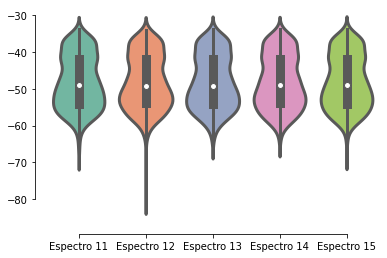

In [ ]:
sns.violinplot(x = None, y=None, data = Datos_Espectros_sin_out_2.iloc[:,10:15], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

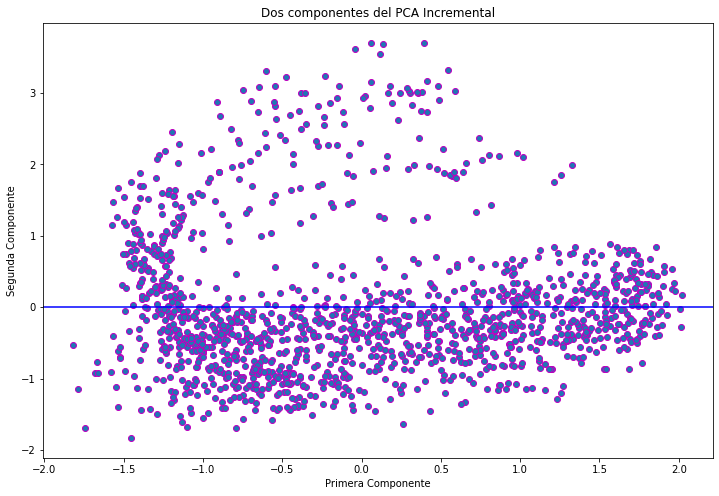

In [ ]:
# REDUCCIÓN DE DIMENSIONALIDAD
# MÉTODO 3: PCA Incremental

from sklearn.decomposition import IncrementalPCA # Cargamos el método PCA incremental
from matplotlib import pyplot

incPCA = IncrementalPCA(n_components = 91, whiten = True, batch_size = 91)
Variables_Principales_IPCA = incPCA.fit_transform(Datos_Min_Max)
Variables_Principales_IPCA

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_IPCA[:,0], Variables_Principales_IPCA[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA Incremental') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y

pyplot.show() # Mostrar figura

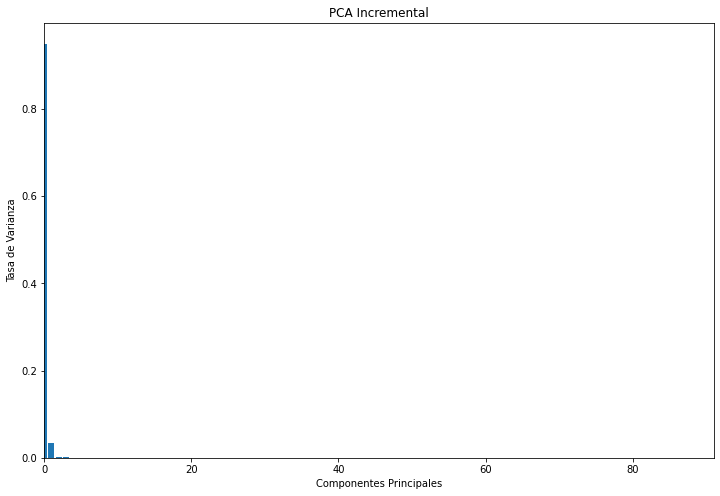

<Figure size 432x288 with 0 Axes>

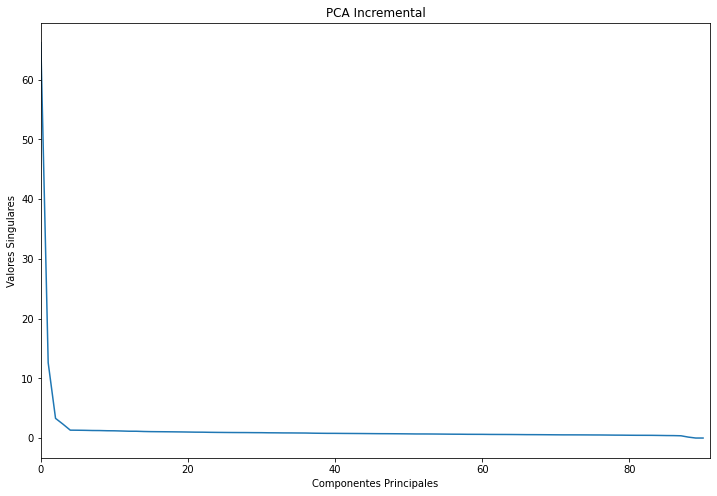

In [ ]:
Varianza_incPCA = incPCA.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales
Valores_Singulares_incPCA = incPCA.singular_values_

fig = pyplot.figure(figsize=(12,8))
pyplot.bar(np.arange(len(Varianza_incPCA)), Varianza_incPCA)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Tasa de Varianza')
pyplot.title('PCA Incremental')
pyplot.xlim(0, len(Varianza_incPCA))
pyplot.figure()

fig = pyplot.figure(figsize=(12,8))
pyplot.plot(np.arange(len(Valores_Singulares_incPCA)), Valores_Singulares_incPCA)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Valores Singulares')
pyplot.title('PCA Incremental')
pyplot.xlim(0, len(Valores_Singulares_incPCA))

pyplot.show()

In [ ]:
Importancia_Componentes_incPCA = pd.DataFrame(data = Varianza_incPCA)
Importancia_Componentes_incPCA = Importancia_Componentes_incPCA.T

print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:49].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 3 componentes:  [98.68056869]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [99.01019726]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [99.27297181]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [99.46689625]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [99.62118392]
Porcentaje de Varianza detectada para las primeras 50 componentes:  [99.74151666]


In [ ]:
Componentes_Seleccionadas = 3

Tasa_Varianza_Explicada_incPCA = np.sum(Varianza_incPCA[0:Componentes_Seleccionadas])

Nuevas_Componentes_incPCA = PCA(Tasa_Varianza_Explicada_incPCA, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

Datos_Reducidos_incPCA = Nuevas_Componentes_incPCA.fit_transform(Datos_Min_Max)

print('Tamaño de los datos originales con MinMax: ', Datos_Min_Max.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_Reducidos_incPCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada_incPCA*100))

Tamaño de los datos originales con MinMax:  (1401, 91)
Tamaño de los datos reducidos:  (1401, 4)
Porcentaje de la varianza explicada con las componentes seleccionadas: 98.68%


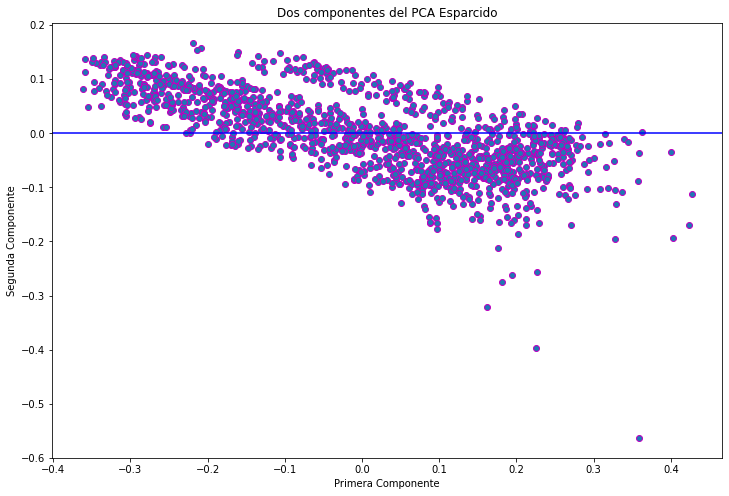

In [ ]:
#  PCA Esparcido

from sklearn.decomposition import SparsePCA # Cargamos el método PCA esparcido
from matplotlib import pyplot

spca = SparsePCA(n_components = 91, alpha = 0.1, ridge_alpha = 0.01, random_state = 17, max_iter = 1000, tol = 1e-3)
Variables_Principales_SPCA = spca.fit_transform(Datos_Min_Max)

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_SPCA[:,0], Variables_Principales_SPCA[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA Esparcido') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y

pyplot.show() # Mostrar figura

In [ ]:
import numpy as np

promedio_1 = np.mean(spca.components_ == 0)

print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio_1))

spca_2 = SparsePCA(n_components = 2 , alpha = 0.5, ridge_alpha = 0.05, random_state = 17, max_iter = 1000, tol = 1e-3)
Datos_SPCA_2 = spca_2.fit_transform(Datos_Min_Max)

promedio_2 = np.mean(spca_2.components_ == 0)

print('Valor promedio de esparcimiento con un número de componentes definida por usuario = {:.3f}'.format(promedio_2))

Valor promedio de esparcimiento con todas las componentes = 0.923
Valor promedio de esparcimiento con un número de componentes definida por usuario = 0.132


In [ ]:
print('Tamaño de los datos originales con MinMax: ', Datos_Min_Max.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_SPCA_2.shape)  # Tamaño de los datos reducidos

Tamaño de los datos originales con MinMax:  (1401, 91)
Tamaño de los datos reducidos:  (1401, 2)


Al analizar diferentes algoritmos para reducir la dimensionalidad de los datos de espectros ópticos, se tiene que los análisis de componentes principales PCA lineal y PCA incremental son los que presentan la mayor tasa de varianza entre las componentes principales que determinan, logrando explicar un porcentaje de varianza del 98.7% sobre este conjunto de datos, con sólo 3 componentes; con el algoritmo Kernel PCA también se logra una reducción de 91 a 3 componentes, pero con un error promedio de 3%. Es decir, la mejor reducción de dimensionalidad de los datos, para que los expertos puedan interpretar de forma correcta el comportamiento de los espectros ópticos, deberá ser un PCA lineal o incremental.



#**PARTE E: Detección de anomalias con datos de espectros ópticos** 

Considerando la base de datos original de la parte D, los expertos desean identificar aquellas muestras (longitudes de onda, para el lenguaje de los expertos en espectros ópticos) que se pueden identificar como comportamientos anómalos de los espectros ópticos. Sin embargo, como hay varios algoritmos de detección de anomalias para datos de alta dimensionalidad, desean conocer cuál de los algoritmos logra identificar la mayor cantidad de anomalias posibles. 

**Nota:** Se recomienda normalizar los datos antes de hacer la detección de anomalias.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

display(Datos_Espectros)

,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.00,-210.00,-64.02,-210.00,-83.66,-63.43,-59.84,-61.58,-210.00,-210.00,-210.00,-62.84,-210.00,-210.00,-210.00,-66.41,-65.75,-210.00,-210.00,-64.16,-210.00,-210.00,-210.00,-210.00,-210.00,-62.34,-66.62,-63.29,-210.00,-210.00,-69.84,-210.00,-210.00,-210.00,-73.06,-70.01,-210.00,-210.00,-210.00,-210.00,...,-210.00,-63.22,-71.21,-210.00,-210.00,-210.00,-67.14,-210.00,-62.99,-60.15,-63.42,-210.00,-210.00,-62.15,-210.00,-210.00,-62.94,-61.64,-65.12,-69.27,-210.00,-210.00,-210.00,-69.15,-210.00,-210.00,-210.00,-68.98,-210.00,-210.00,-61.80,-210.00,-63.29,-210.00,-210.00,-60.49,-78.61,-210.00,-210.00,-66.17
1,-210.00,-64.63,-210.00,-210.00,-210.00,-210.00,-210.00,-63.48,-210.00,-210.00,-210.00,-66.45,-210.00,-210.00,-210.00,-64.92,-63.60,-210.00,-86.67,-67.38,-75.40,-210.00,-60.49,-61.05,-71.87,-63.67,-210.00,-61.04,-210.00,-75.74,-210.00,-210.00,-210.00,-65.16,-210.00,-60.34,-69.69,-76.94,-210.00,-210.00,...,-210.00,-65.11,-60.99,-210.00,-64.17,-65.54,-69.30,-65.54,-210.00,-66.92,-61.63,-210.00,-210.00,-210.00,-64.27,-210.00,-65.52,-210.00,-65.96,-65.30,-72.39,-67.88,-64.99,-210.00,-63.53,-210.00,-62.24,-210.00,-210.00,-62.74,-69.12,-63.10,-62.05,-69.03,-69.16,-64.39,-210.00,-210.00,-210.00,-210.00
2,-65.39,-68.48,-64.56,-65.30,-67.39,-70.44,-60.92,-63.52,-63.84,-210.00,-210.00,-62.87,-210.00,-74.17,-210.00,-210.00,-62.23,-70.32,-210.00,-62.72,-210.00,-210.00,-79.69,-210.00,-66.96,-62.79,-210.00,-210.00,-210.00,-210.00,-64.03,-210.00,-210.00,-210.00,-210.00,-210.00,-66.61,-210.00,-62.07,-77.33,...,-61.69,-210.00,-210.00,-210.00,-83.25,-67.38,-210.00,-67.38,-59.35,-66.77,-210.00,-65.60,-210.00,-63.67,-60.39,-67.57,-210.00,-61.34,-210.00,-60.27,-210.00,-210.00,-68.35,-71.71,-210.00,-210.00,-210.00,-62.00,-60.98,-59.06,-67.07,-210.00,-64.13,-67.56,-61.75,-69.27,-62.78,-62.91,-69.26,-210.00
3,-210.00,-60.27,-73.57,-83.65,-72.10,-210.00,-65.00,-66.16,-210.00,-63.75,-65.61,-210.00,-67.46,-210.00,-210.00,-210.00,-210.00,-64.50,-64.25,-210.00,-210.00,-210.00,-210.00,-66.95,-74.62,-210.00,-210.00,-68.15,-66.60,-65.11,-210.00,-210.00,-210.00,-210.00,-210.00,-61.34,-210.00,-65.95,-63.80,-65.42,...,-210.00,-66.18,-63.51,-210.00,-64.19,-210.00,-65.12,-210.00,-62.75,-66.60,-210.00,-210.00,-210.00,-63.66,-65.20,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-64.24,-210.00,-74.26,-210.00,-71.13,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-66.53,-64.01,-66.33,-210.00,-210.00
4,-65.69,-64.45,-210.00,-60.33,-67.97,-68.71,-210.00,-71.10,-61.00,-61.02,-210.00,-64.45,-63.50,-210.00,-210.00,-78.09,-210.00,-60.24,-210.00,-62.10,-74.02,-70.96,-210.00,-210.00,-76.41,-65.39,-210.00,-63.91,-63.36,-60.93,-210.00,-210.00,-210.00,-66.10,-210.00,-69.64,-67.36,-67.01,-67.77,-75.53,...,-64.62,-68.19,-71.72,-210.00,-63.56,-210.00,-210.00,-210.00,-210.00,-63.29,-66.35,-61.84,-210.00,-210.00,-76.75,-61.05,-210.00,-68.62,-61.67,-210.00,-210.00,-210.00,-210.00,-61.66,-59.74,-61.63,-210.00,-210.00,-65.89,-210.00,-210.00,-64.08,-58.07,-63.52,-210.00,-73.36,-70.89,-64.21,-210.00,-210.00
...,...,...,...,

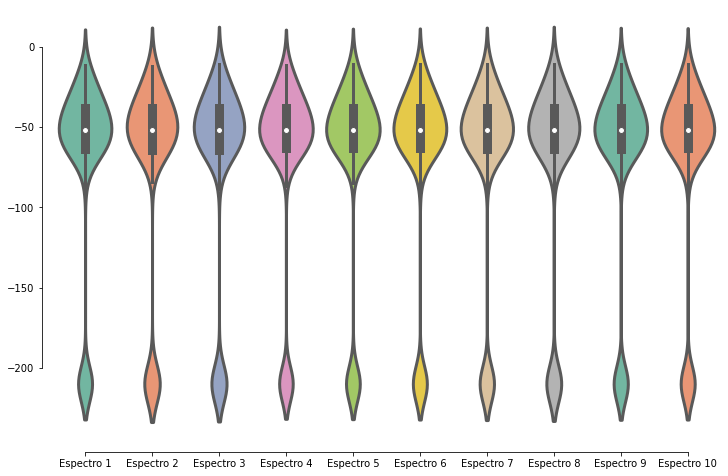

In [ ]:
import seaborn as sns # Librería de visualización para data science

fig = pyplot.figure(figsize=(12,8))
sns.violinplot(x = None, y=None, data = Datos_Espectros.iloc[:,0:10], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

In [ ]:
fig = pyplot.figure(figsize=(12,8)) 
sns.violinplot(x = None, y=None, data = Datos_Espectros.iloc[:,10:20], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

SS = StandardScaler()
data_espectros_SSC = SS.fit_transform(Datos_Espectros)

display(data_espectros_SSC)

array([[-2.48704777, -2.26468829,  0.11822042, ..., -2.09899187,
        -2.2342139 ,  0.15378238],
       [-2.48704777,  0.11794267, -2.30746071, ..., -2.09899187,
        -2.2342139 , -2.12199285],
       [ 0.05147758,  0.05484073,  0.10924749, ...,  0.2210599 ,
         0.0845848 , -2.12199285],
       ...,
       [ 0.1248545 ,  0.17153835,  0.16807001, ...,  0.07847191,
        -2.2342139 , -2.12199285],
       [ 0.0830753 ,  0.16531011,  0.10758584, ..., -2.09899187,
         0.22924199, -2.12199285],
       [ 0.11116216, -2.26468829,  0.10791817, ..., -2.09899187,
        -2.2342139 , -2.12199285]])

In [ ]:
def anomalidadPuntaje(datos_OR, datos_Reducidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reducidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
def data_no_outilers(datas, puntaje, umbral):
  pos = np.where(puntaje < umbral)
  pos = np.asarray(pos)
  pos = np.hstack(pos)
  datos_sin_outilers = datas.loc[pos, :]
  return datos_sin_outilers

Puntajes de outliers:  0       1.000000
1       0.081366
2       0.045396
3       0.033374
4       0.029314
          ...   
3496    0.022924
3497    0.020639
3498    0.014436
3499    0.026671
3500    0.016837
Length: 3501, dtype: float64


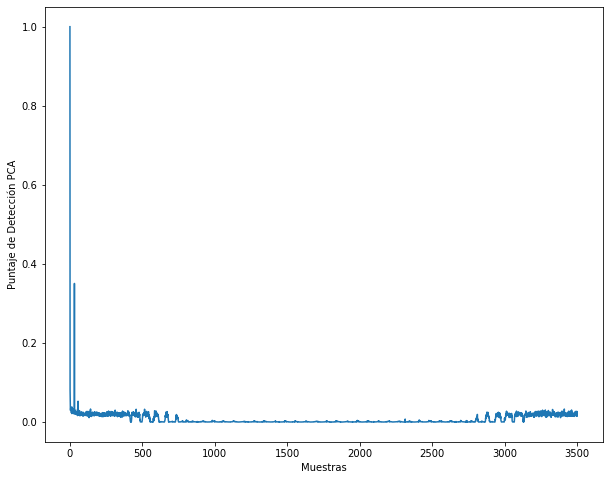

,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
1,-210.00,-64.63,-210.00,-210.00,-210.00,-210.00,-210.00,-63.48,-210.00,-210.00,-210.00,-66.45,-210.00,-210.00,-210.00,-64.92,-63.60,-210.00,-86.67,-67.38,-75.40,-210.00,-60.49,-61.05,-71.87,-63.67,-210.00,-61.04,-210.00,-75.74,-210.00,-210.00,-210.00,-65.16,-210.00,-60.34,-69.69,-76.94,-210.00,-210.00,...,-210.00,-65.11,-60.99,-210.00,-64.17,-65.54,-69.30,-65.54,-210.00,-66.92,-61.63,-210.00,-210.00,-210.00,-64.27,-210.00,-65.52,-210.00,-65.96,-65.30,-72.39,-67.88,-64.99,-210.00,-63.53,-210.00,-62.24,-210.00,-210.00,-62.74,-69.12,-63.10,-62.05,-69.03,-69.16,-64.39,-210.00,-210.00,-210.00,-210.00
2,-65.39,-68.48,-64.56,-65.30,-67.39,-70.44,-60.92,-63.52,-63.84,-210.00,-210.00,-62.87,-210.00,-74.17,-210.00,-210.00,-62.23,-70.32,-210.00,-62.72,-210.00,-210.00,-79.69,-210.00,-66.96,-62.79,-210.00,-210.00,-210.00,-210.00,-64.03,-210.00,-210.00,-210.00,-210.00,-210.00,-66.61,-210.00,-62.07,-77.33,...,-61.69,-210.00,-210.00,-210.00,-83.25,-67.38,-210.00,-67.38,-59.35,-66.77,-210.00,-65.60,-210.00,-63.67,-60.39,-67.57,-210.00,-61.34,-210.00,-60.27,-210.00,-210.00,-68.35,-71.71,-210.00,-210.00,-210.00,-62.00,-60.98,-59.06,-67.07,-210.00,-64.13,-67.56,-61.75,-69.27,-62.78,-62.91,-69.26,-210.00
3,-210.00,-60.27,-73.57,-83.65,-72.10,-210.00,-65.00,-66.16,-210.00,-63.75,-65.61,-210.00,-67.46,-210.00,-210.00,-210.00,-210.00,-64.50,-64.25,-210.00,-210.00,-210.00,-210.00,-66.95,-74.62,-210.00,-210.00,-68.15,-66.60,-65.11,-210.00,-210.00,-210.00,-210.00,-210.00,-61.34,-210.00,-65.95,-63.80,-65.42,...,-210.00,-66.18,-63.51,-210.00,-64.19,-210.00,-65.12,-210.00,-62.75,-66.60,-210.00,-210.00,-210.00,-63.66,-65.20,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-64.24,-210.00,-74.26,-210.00,-71.13,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-66.53,-64.01,-66.33,-210.00,-210.00
4,-65.69,-64.45,-210.00,-60.33,-67.97,-68.71,-210.00,-71.10,-61.00,-61.02,-210.00,-64.45,-63.50,-210.00,-210.00,-78.09,-210.00,-60.24,-210.00,-62.10,-74.02,-70.96,-210.00,-210.00,-76.41,-65.39,-210.00,-63.91,-63.36,-60.93,-210.00,-210.00,-210.00,-66.10,-210.00,-69.64,-67.36,-67.01,-67.77,-75.53,...,-64.62,-68.19,-71.72,-210.00,-63.56,-210.00,-210.00,-210.00,-210.00,-63.29,-66.35,-61.84,-210.00,-210.00,-76.75,-61.05,-210.00,-68.62,-61.67,-210.00,-210.00,-210.00,-210.00,-61.66,-59.74,-61.63,-210.00,-210.00,-65.89,-210.00,-210.00,-64.08,-58.07,-63.52,-210.00,-73.36,-70.89,-64.21,-210.00,-210.00
5,-60.93,-210.00,-69.83,-210.00,-61.50,-210.00,-64.27,-210.00,-63.45,-62.72,-60.64,-210.00,-210.00,-62.49,-210.00,-210.00,-72.38,-68.02,-67.28,-210.00,-61.31,-210.00,-210.00,-210.00,-63.10,-210.00,-59.34,-210.00,-210.00,-64.45,-65.03,-210.00,-210.00,-59.75,-58.61,-210.00,-61.33,-210.00,-210.00,-65.28,...,-61.52,-210.00,-210.00,-210.00,-69.69,-63.11,-61.89,-63.11,-210.00,-210.00,-71.15,-210.00,-210.00,-210.00,-59.54,-70.52,-210.00,-61.18,-210.00,-210.00,-60.86,-73.44,-59.47,-210.00,-63.94,-61.46,-210.00,-61.93,-64.90,-67.55,-63.89,-80.04,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-69.12,-60.62
...,...,...,...,...,...,

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import numpy as np

pca = PCA(n_components = 91, whiten = False, random_state = 17) # n_components debe ser menor o igual al número de características de los datos
data_pca = pca.fit_transform(data_espectros_SSC)

data_espectros_SSC_pd = pd.DataFrame(data = data_espectros_SSC)
data_pca = pd.DataFrame(data = data_pca, index = data_espectros_SSC_pd.index)

data_pca_inversa = pca.inverse_transform(data_pca)
data_pca_inversa = pd.DataFrame(data = data_pca_inversa, index = data_espectros_SSC_pd.index)

puntaje_PCA = anomalidadPuntaje(data_espectros_SSC_pd, data_pca_inversa)

print("Puntajes de outliers: ", puntaje_PCA)

pyplot.figure(figsize=(10,8))
pyplot.plot(np.arange(0,puntaje_PCA.shape[0],1), puntaje_PCA)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección PCA')
pyplot.show()

datos_sin_outilers = data_no_outilers(Datos_Espectros, puntaje_PCA, 0.15)
datos_sin_outilers 

Detección:  [-1 -1 -1 ... -1 -1 -1]
Puntaje de las muestras:  [-0.645219   -0.62388187 -0.6260399  ... -0.6211814  -0.62349092
 -0.62914157]
Número de datos atípicos:  875


,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
4,-65.69,-64.45,-210.00,-60.33,-67.97,-68.71,-210.00,-71.10,-61.00,-61.02,-210.00,-64.45,-63.50,-210.00,-210.00,-78.09,-210.00,-60.24,-210.00,-62.10,-74.02,-70.96,-210.00,-210.00,-76.41,-65.39,-210.00,-63.91,-63.36,-60.93,-210.00,-210.00,-210.00,-66.10,-210.00,-69.64,-67.36,-67.01,-67.77,-75.53,...,-64.62,-68.19,-71.72,-210.00,-63.56,-210.00,-210.00,-210.00,-210.00,-63.29,-66.35,-61.84,-210.00,-210.00,-76.75,-61.05,-210.00,-68.62,-61.67,-210.00,-210.00,-210.00,-210.00,-61.66,-59.74,-61.63,-210.00,-210.00,-65.89,-210.00,-210.00,-64.08,-58.07,-63.52,-210.00,-73.36,-70.89,-64.21,-210.00,-210.00
9,-65.44,-210.00,-62.20,-210.00,-210.00,-210.00,-67.37,-73.16,-70.94,-210.00,-210.00,-67.87,-75.39,-65.08,-66.52,-61.50,-67.89,-210.00,-67.81,-61.24,-210.00,-210.00,-66.43,-210.00,-67.23,-60.07,-69.29,-64.07,-66.48,-210.00,-210.00,-66.93,-66.93,-83.24,-63.67,-210.00,-210.00,-60.51,-64.94,-61.60,...,-67.30,-62.70,-210.00,-76.17,-68.50,-210.00,-62.44,-210.00,-210.00,-61.51,-210.00,-60.36,-67.80,-210.00,-210.00,-210.00,-210.00,-62.91,-210.00,-65.18,-64.27,-210.00,-210.00,-77.63,-71.61,-210.00,-78.21,-210.00,-210.00,-65.87,-60.16,-65.95,-63.90,-72.26,-62.38,-210.00,-60.94,-71.27,-210.00,-63.29
16,-210.00,-210.00,-62.54,-70.06,-210.00,-210.00,-210.00,-69.18,-69.15,-210.00,-62.22,-65.30,-65.10,-72.16,-210.00,-65.74,-59.00,-71.10,-210.00,-64.85,-210.00,-63.15,-61.44,-60.63,-210.00,-59.26,-210.00,-61.63,-210.00,-210.00,-210.00,-64.89,-64.89,-59.30,-70.11,-66.16,-63.23,-210.00,-210.00,-210.00,...,-75.80,-210.00,-210.00,-210.00,-73.88,-65.19,-75.27,-65.19,-67.59,-210.00,-62.69,-60.96,-210.00,-64.89,-62.81,-60.83,-210.00,-59.38,-63.60,-64.94,-210.00,-66.44,-210.00,-210.00,-65.67,-66.12,-210.00,-64.30,-210.00,-61.29,-73.53,-63.80,-66.40,-210.00,-63.60,-69.83,-65.34,-63.04,-66.80,-210.00
21,-60.48,-64.36,-62.17,-64.97,-210.00,-67.28,-67.86,-70.04,-68.59,-68.54,-210.00,-67.54,-61.78,-67.55,-210.00,-210.00,-63.69,-67.07,-210.00,-64.18,-61.93,-210.00,-73.92,-210.00,-210.00,-71.43,-64.98,-210.00,-63.90,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-210.00,-74.73,-210.00,-62.83,-210.00,...,-210.00,-210.00,-62.49,-66.54,-64.32,-61.84,-70.35,-61.84,-61.14,-71.84,-73.70,-64.08,-210.00,-63.41,-60.41,-70.15,-61.55,-68.54,-64.53,-210.00,-210.00,-67.64,-65.74,-71.89,-70.94,-69.78,-210.00,-210.00,-68.34,-61.41,-210.00,-72.13,-210.00,-210.00,-66.44,-210.00,-210.00,-210.00,-210.00,-64.85
25,-64.14,-210.00,-210.00,-67.02,-66.12,-210.00,-66.95,-66.34,-68.26,-62.90,-60.49,-210.00,-63.35,-67.45,-61.81,-210.00,-210.00,-210.00,-62.36,-72.83,-210.00,-210.00,-210.00,-65.57,-62.41,-210.00,-63.06,-210.00,-73.57,-210.00,-61.53,-70.23,-70.23,-60.52,-63.06,-62.51,-73.57,-210.00,-64.49,-62.27,...,-210.00,-62.91,-69.28,-210.00,-210.00,-210.00,-61.30,-210.00,-66.92,-78.74,-74.31,-64.76,-70.96,-66.27,-70.91,-210.00,-66.33,-210.00,-62.71,-63.56,-69.28,-66.66,-210.00,-67.16,-62.39,-210.00,-63.25,-210.00,-210.00,-210.00,-68.71,-210.00,-67.28,-210.00,-61.75,-210.00,-210.00,-210.00,-60.94,-210.00
...,...,...,...,...,...,...,...,...,...,...,...,...,.

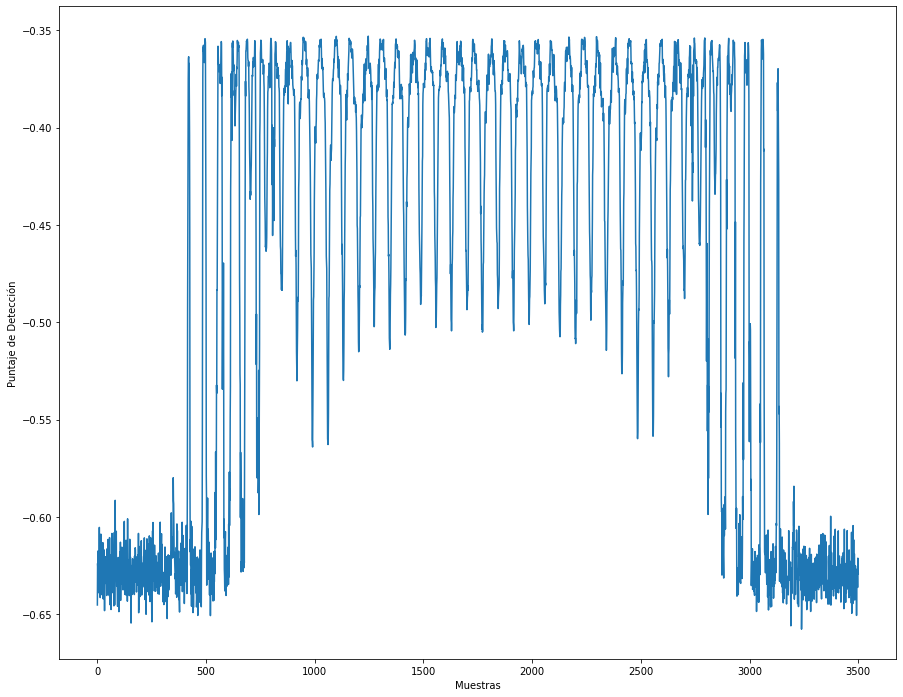

In [ ]:
from sklearn.ensemble import IsolationForest # algoritmo de aislamiento forestal
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

ISF = IsolationForest(n_estimators = 91, max_samples = 'auto', contamination = 0.25, random_state = 17)
DA = ISF.fit_predict(Datos_Espectros)

Puntaje = ISF.score_samples(Datos_Espectros) # Puntaje de los datos. Si el puntaje es más pequeño, entonces se considera un dato atípico

print("Detección: ", DA)
print("Puntaje de las muestras: ", Puntaje)

ground_truth = np.ones(len(Datos_Espectros), dtype = int)
n_error = (DA != ground_truth).sum() # número de datos atípicos

print("Número de datos atípicos: ", n_error)

pos = np.where(DA == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)

datos_sin_outilers_esp = Datos_Espectros.loc[pos, :]
display(datos_sin_outilers_esp)

pyplot.figure(figsize=(15,12))
pyplot.plot(np.arange(0,Puntaje.shape[0],1), Puntaje)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección')
pyplot.show()

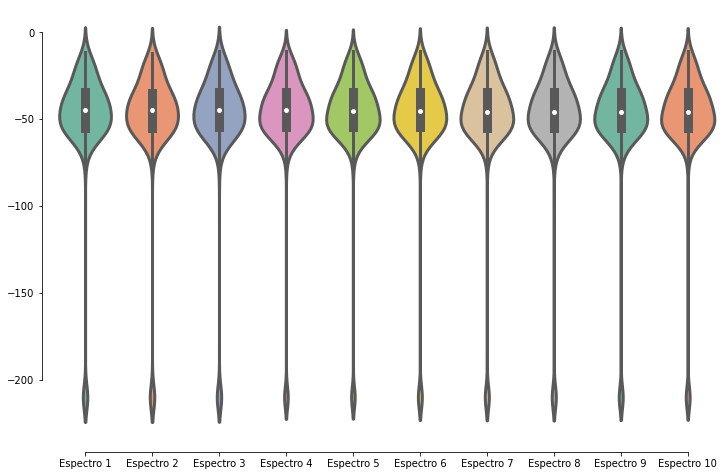

In [ ]:
fig = pyplot.figure(figsize=(12,8)) 
sns.violinplot(x = None, y=None, data = datos_sin_outilers_esp.iloc[:,0:10], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

In [ ]:
# Detección de datos atípicos: Z-SCORE

from scipy import stats
import numpy as np

Espectros = Datos_Espectros.copy()
datos= Espectros.values
datos

array([[-210.  , -210.  ,  -64.02, ..., -210.  , -210.  ,  -66.17],
       [-210.  ,  -64.63, -210.  , ..., -210.  , -210.  , -210.  ],
       [ -65.39,  -68.48,  -64.56, ...,  -62.91,  -69.26, -210.  ],
       ...,
       [ -61.21,  -61.36,  -61.02, ...,  -71.95, -210.  , -210.  ],
       [ -63.59,  -61.74,  -64.66, ..., -210.  ,  -60.48, -210.  ],
       [ -61.99, -210.  ,  -64.64, ..., -210.  , -210.  , -210.  ]])

In [ ]:
z = np.abs(stats.zscore(Espectros))
print(z)
z.mean()

[[2.48704777 2.26468829 0.11822042 ... 2.09899187 2.2342139  0.15378238]
 [2.48704777 0.11794267 2.30746071 ... 2.09899187 2.2342139  2.12199285]
 [0.05147758 0.05484073 0.10924749 ... 0.2210599  0.0845848  2.12199285]
 ...
 [0.1248545  0.17153835 0.16807001 ... 0.07847191 2.2342139  2.12199285]
 [0.0830753  0.16531011 0.10758584 ... 2.09899187 0.22924199 2.12199285]
 [0.11116216 2.26468829 0.10791817 ... 2.09899187 2.2342139  2.12199285]]


0.7005557309263916

In [ ]:
Espectros1= Espectros[(z < 2.1).all(axis = 1)]
Espectros1

,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,Espectro 11,Espectro 12,Espectro 13,Espectro 14,Espectro 15,Espectro 16,Espectro 17,Espectro 18,Espectro 19,Espectro 20,Espectro 21,Espectro 22,Espectro 23,Espectro 24,Espectro 25,Espectro 26,Espectro 27,Espectro 28,Espectro 29,Espectro 30,Espectro 31,Espectro 32,Espectro 33,Espectro 34,Espectro 35,Espectro 36,Espectro 37,Espectro 38,Espectro 39,Espectro 40,...,Espectro 52,Espectro 53,Espectro 54,Espectro 55,Espectro 56,Espectro 57,Espectro 58,Espectro 59,Espectro 60,Espectro 61,Espectro 62,Espectro 63,Espectro 64,Espectro 65,Espectro 66,Espectro 67,Espectro 68,Espectro 69,Espectro 70,Espectro 71,Espectro 72,Espectro 73,Espectro 74,Espectro 75,Espectro 76,Espectro 77,Espectro 78,Espectro 79,Espectro 80,Espectro 81,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
419,-64.47,-60.26,-58.12,-59.86,-57.44,-57.28,-59.20,-57.93,-59.44,-58.43,-59.60,-57.86,-57.30,-57.63,-55.69,-57.27,-56.69,-57.67,-57.74,-55.45,-57.50,-57.33,-58.60,-55.91,-58.90,-57.10,-58.49,-57.05,-57.56,-59.15,-55.23,-61.39,-61.39,-56.77,-56.86,-56.78,-58.15,-57.16,-57.98,-56.41,...,-57.51,-57.82,-57.05,-57.04,-57.98,-56.52,-58.95,-56.52,-57.36,-57.17,-57.05,-60.89,-59.06,-57.30,-58.41,-59.46,-59.18,-59.76,-58.23,-59.85,-59.24,-61.51,-57.26,-57.88,-61.29,-59.68,-58.60,-60.11,-57.92,-59.50,-57.46,-62.07,-60.24,-60.34,-57.19,-60.21,-62.12,-59.39,-60.55,-62.34
420,-58.16,-60.70,-62.74,-56.97,-57.33,-56.94,-58.85,-57.63,-57.36,-57.29,-56.83,-56.41,-57.88,-59.66,-56.65,-55.79,-56.21,-57.73,-57.22,-59.84,-56.35,-57.37,-55.98,-57.42,-57.44,-57.53,-58.53,-57.51,-58.80,-56.33,-57.72,-55.35,-55.35,-56.74,-57.26,-58.51,-57.28,-58.32,-56.53,-56.65,...,-57.17,-56.92,-56.13,-58.08,-57.87,-55.45,-57.12,-55.45,-58.68,-57.92,-56.88,-58.76,-57.10,-57.53,-57.40,-58.65,-57.94,-57.82,-58.60,-56.44,-56.32,-58.55,-58.64,-56.75,-58.04,-59.17,-58.15,-57.75,-56.89,-58.84,-60.83,-58.80,-60.66,-56.84,-57.85,-60.28,-62.98,-57.33,-72.38,-58.64
422,-55.70,-62.00,-55.41,-57.85,-58.10,-56.84,-55.91,-56.60,-55.46,-56.45,-56.05,-55.76,-57.94,-57.45,-58.16,-56.62,-59.87,-56.77,-56.81,-56.60,-56.79,-56.24,-57.60,-59.36,-58.18,-55.55,-56.49,-56.40,-57.17,-56.44,-58.02,-57.15,-57.15,-55.78,-58.33,-58.07,-57.47,-56.85,-57.79,-57.63,...,-58.64,-59.41,-57.77,-60.24,-58.35,-58.23,-56.74,-58.23,-58.31,-58.13,-64.00,-57.65,-57.16,-55.92,-58.22,-60.05,-58.33,-58.36,-59.56,-61.45,-71.40,-57.30,-60.34,-59.01,-58.66,-57.06,-59.41,-61.64,-58.14,-56.40,-61.78,-58.18,-58.13,-59.27,-58.34,-62.52,-63.24,-61.37,-67.38,-59.94
486,-66.67,-59.12,-58.25,-64.74,-57.46,-58.74,-54.83,-56.89,-56.25,-55.82,-54.55,-53.30,-54.76,-54.20,-54.22,-54.91,-54.26,-53.96,-54.56,-54.17,-53.46,-54.28,-54.34,-53.45,-54.76,-54.88,-57.30,-53.79,-54.50,-53.76,-54.62,-54.09,-54.09,-53.54,-53.81,-55.69,-53.87,-53.58,-55.14,-55.33,...,-54.64,-55.30,-54.53,-55.22,-54.96,-55.48,-56.30,-55.48,-54.31,-55.02,-54.86,-54.76,-56.35,-55.97,-55.38,-55.44,-54.24,-55.11,-56.04,-54.26,-54.34,-55.11,-57.81,-56.09,-56.07,-55.52,-59.44,-55.32,-55.20,-55.15,-56.50,-55.25,-55.84,-57.21,-54.40,-56.31,-54.94,-55.79,-55.43,-56.91
487,-55.54,-59.83,-55.56,-56.95,-54.80,-54.95,-53.16,-54.10,-53.16,-55.07,-53.43,-52.16,-52.66,-53.52,-52.18,-51.92,-51.93,-52.14,-52.44,-52.62,-52.75,-52.48,-52.02,-52.63,-53.00,-53.10,-53.24,-52.99,-53.02,-52.08,-52.59,-51.19,-51.19,-52.69,-51.64,-52.41,-52.19,-52.41,-51.98,-52.45,...,-52.46,-53.39,-53.52,-53.69,-53.41,-54.18,-54.27,-54.18,-52.30,-53.74,-53.38,-52.96,-54.33,-52.94,-54.06,-53.59,-53.29,-54.88,-53.95,-52.99,-54.04,-53.82,-53.33,-53.67,-53.95,-55.37,-56.09,-56.22,-54.27,-55.21,-53.77,-53.64,-54.59,-54.03,-54.81,-55.38,-54.95,-55.72,-54.17,-54.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

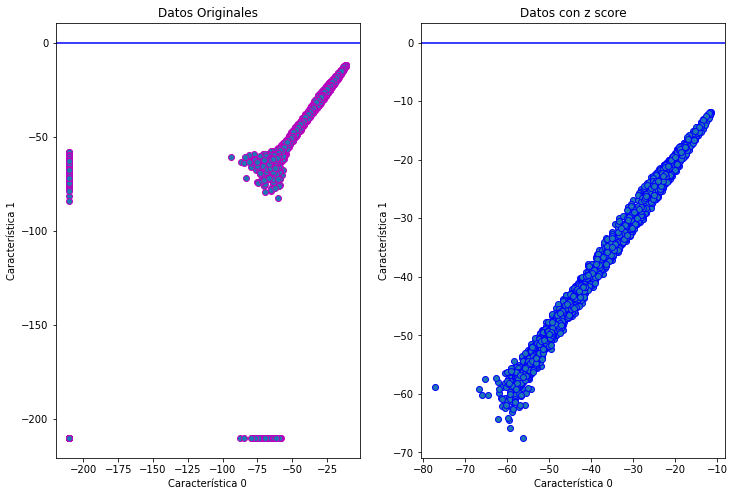

In [ ]:
fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Espectros.iloc[:,0] , Datos_Espectros.iloc[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Espectros1.iloc[:,0], Espectros1.iloc[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con z score') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

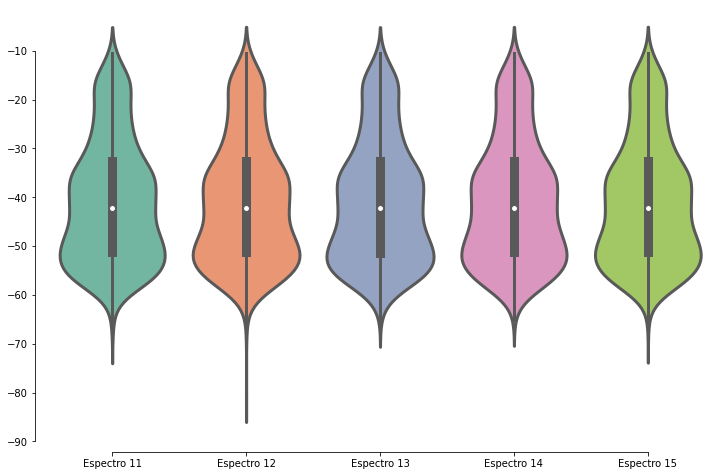

In [ ]:
fig = pyplot.figure(figsize=(12,8)) 
sns.violinplot(x = None, y=None, data = Espectros1.iloc[:,10:15], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

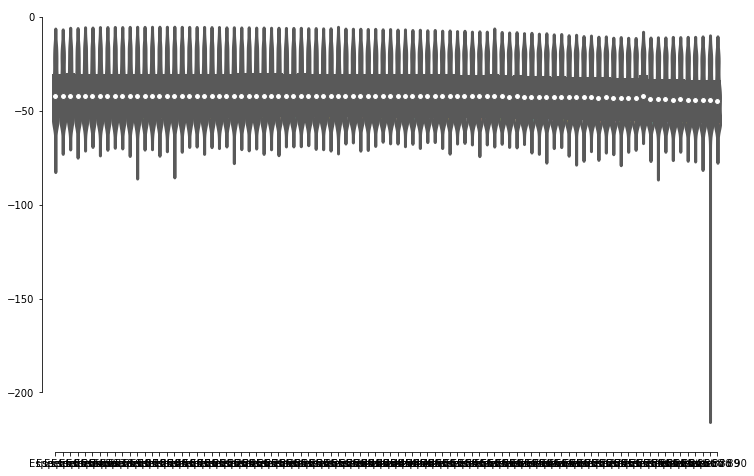

In [ ]:
fig = pyplot.figure(figsize=(12,8)) 
sns.violinplot(x = None, y=None, data = Espectros1.iloc[:,0:90], linewidth = 3, palette="Set2", fliersize = 8)
sns.despine(offset=10, trim=True);

Como puede inferirse a partir de los anteriores gráficos de violín, los mejores modelos para detectar anomalías o datos típicos, para este conjunto de datos de espectros ópticos, son Isolation Forest y Z-Score.